In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

#Vitesse du son au moment de la mesure, dependant de la temperature:
Tc = 21.5 
C = np.sqrt( 1.4 * 287 *(Tc + 273) )

NbMems = 256
Fe = 50000
NbViol = 6

## Mesure des TOAs entre le point d'impact du marteau et les micros de l'antenne
### à partir de la réponse impulsionnelle  des 6 violons et 5 impacts

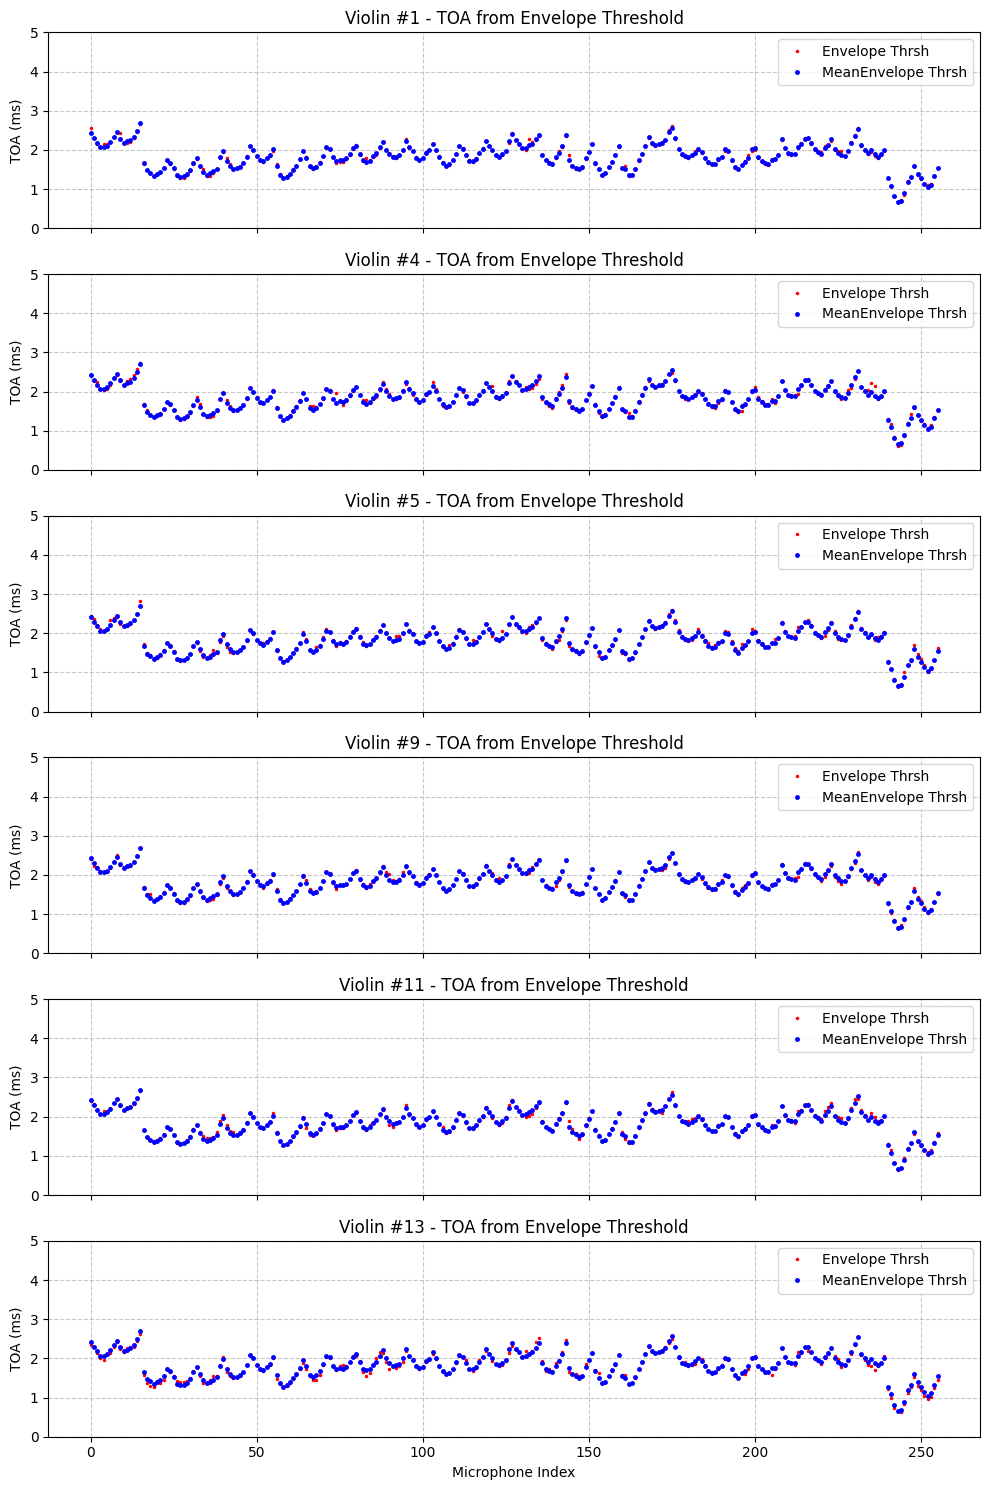

In [8]:
t = np.load('./../results/ViolinsFRFsAndRIs.npz')
RIhm = np.load('./../results/ViolinsFRFsAndRIs.npz')['RIhm']
NumViolon = np.load('./../results/NumViolon.npz')['NumViolon']


# TOAs from Envelope Threshold
# Compute TOAs based on the envelope of the Impulse Response crossing a threshold
# RIhm shape is assumed to be (NbViol, WinLen, NbMems)

# Compute Envelope using Hilbert transform
Env_calc = np.abs(hilbert(RIhm, axis=1))
# Find index of the first threshold crossing, threshold being 125% of the rms level of the first 1000 samples
threshold = 1.1 * np.sqrt(np.mean(Env_calc[:, :1000, :]**2, axis=1, keepdims=True))
crossings = Env_calc > threshold
first_crossing_indices = np.argmax(crossings, axis=1)  # Get the first index where crossing occurs for each violin and microphone

# Convert index to time (TOA)
TOAs_Env = first_crossing_indices / Fe

# Plot TOAs vs Microphones
fig, axes = plt.subplots(NbViol, 1, figsize=(10, 2.5 * NbViol), sharex=True)
if NbViol == 1:
    axes = [axes]

for v in range(NbViol):
    ax = axes[v]
    ax.plot(np.arange(NbMems), TOAs_Env[v, :] * 1000, '.', color='red', markersize=3, label='Envelope Thrsh')
    ax.plot(np.arange(NbMems), np.mean(TOAs_Env,0) * 1000, '.', color='b', markersize=5, label='MeanEnvelope Thrsh')
    ax.set_ylim([0, 5])
    ax.set_ylabel('TOA (ms)')
    ax.set_title(f'Violin #{NumViolon[v]} - TOA from Envelope Threshold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='upper right')

axes[-1].set_xlabel('Microphone Index')
plt.tight_layout()
plt.show()

np.save('./../results/MeanHammerImpactToMemsTOAs.npy', np.mean(TOAs_Env, axis=0))

In [9]:
#Trouver l'indice du microphonesitué à 1 m du marteau (en se basant sur les TOAs)
Distance_to_Hammer = TOAs_Env * C
Mic_1m_Index = np.argmin(np.abs(Distance_to_Hammer - 1), axis=1)
print("Microphone indices closest to 1m from the hammer for each violin:", Mic_1m_Index)

Microphone indices closest to 1m from the hammer for each violin: [15 15 15 15 15 15]
